In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv(r"C:\Users\hp\OneDrive\Data Science\Practical\Titanic-data preprocessing\DATASET\train.csv",header=0,dtype={'Age':np.float64})
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
del titanic['Name']

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
del titanic['Ticket']
del titanic['Fare']
del titanic['Cabin']

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [9]:
def getNumber(str):
    if(str=='male'):
        return 1
    else:
        return 0

titanic['Gender'] = titanic['Sex'].apply(getNumber)
titanic.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,0
2,3,1,3,female,26.0,0,0,S,0
3,4,1,1,female,35.0,1,0,S,0
4,5,0,3,male,35.0,0,0,S,1


In [10]:
del titanic['Sex']

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [13]:
meanS = titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

In [14]:
titanic['Age'] = np.where(pd.isnull(titanic.Age) & titanic.Survived == 1,meanS,titanic['Age'])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            125
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [16]:
meanNS = titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

In [17]:
titanic['Age'].fillna(meanNS,inplace=True)

In [18]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Embarked       2
Gender         0
dtype: int64

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [20]:
survivedQ = titanic[titanic.Embarked=='Q'][titanic.Survived==1].shape[0]
survivedC = titanic[titanic.Embarked=='C'][titanic.Survived==1].shape[0]
survivedS = titanic[titanic.Embarked=='S'][titanic.Survived==1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)


30
93
217


C:\Users\hp\AppData\Local\Temp\ipykernel_9956\843539775.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked=='Q'][titanic.Survived==1].shape[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_9956\843539775.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked=='C'][titanic.Survived==1].shape[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_9956\843539775.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked=='S'][titanic.Survived==1].shape[0]


In [21]:
survivedQ = titanic[titanic.Embarked=='Q'][titanic.Survived==0].shape[0]
survivedC = titanic[titanic.Embarked=='C'][titanic.Survived==0].shape[0]
survivedS = titanic[titanic.Embarked=='S'][titanic.Survived==0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1347231797.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked=='Q'][titanic.Survived==0].shape[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1347231797.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked=='C'][titanic.Survived==0].shape[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1347231797.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked=='S'][titanic.Survived==0].shape[0]


In [22]:
titanic.dropna(inplace=True)

In [23]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Embarked       0
Gender         0
dtype: int64

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [25]:
titanic.rename(columns={'Gender':'Sex'},inplace=True)

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [27]:
titanic.rename(columns={'sex':'Sex'},inplace=True)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [29]:
def getEmp(str):
    if(str=='S'):
        return 1
    elif(str=='Q'):
        return 2
    else:
        return 3

In [30]:
titanic['Embark'] = titanic['Embarked'].apply(getEmp)

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex,Embark
0,1,0,3,22.0,1,0,S,1,1
1,2,1,1,38.0,1,0,C,0,3
2,3,1,3,26.0,0,0,S,0,1
3,4,1,1,35.0,1,0,S,0,1
4,5,0,3,35.0,0,0,S,1,1


In [32]:
del titanic['Embarked']
titanic.rename(columns={'Embark':'Embarked'},inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex,Embarked
0,1,0,3,22.0,1,0,1,1
1,2,1,1,38.0,1,0,0,3
2,3,1,3,26.0,0,0,0,1
3,4,1,1,35.0,1,0,0,1
4,5,0,3,35.0,0,0,1,1


In [33]:
import matplotlib.pyplot as plt

In [57]:
males =titanic[titanic.Sex==1].shape[0]

In [58]:
males

577

In [60]:
females = titanic[titanic.Sex==0].shape[0]
females

312

In [46]:
p=[males,females]
p

[577, 312]

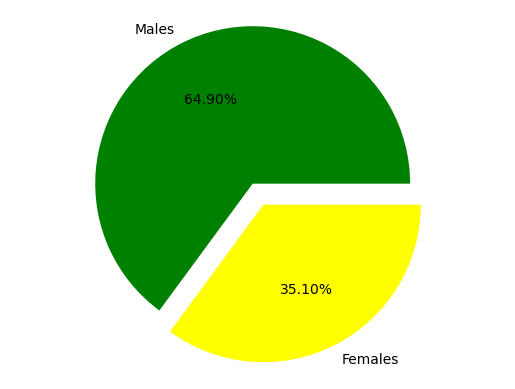

In [50]:
plt.pie(p,
       labels=['Males','Females'],
       colors=['Green','Yellow'],
       explode=(0.15,0),
        startangle=0,
       autopct="%.2f%%")
plt.axis('equal')
plt.show()

In [61]:
MaleS = titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
MaleN = titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
FemaleS = titanic[titanic.Sex==0][titanic.Survived==1].shape[0]
FemaleN = titanic[titanic.Sex==0][titanic.Survived==0].shape[0]
p=[MaleS,MaleN,FemaleS,FemaleN]
p


C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1883740705.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS = titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1883740705.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN = titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1883740705.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS = titanic[titanic.Sex==0][titanic.Survived==1].shape[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1883740705.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN = titanic[titanic.Sex==0][titanic.Survived==0].shape[0]


[109, 468, 231, 81]

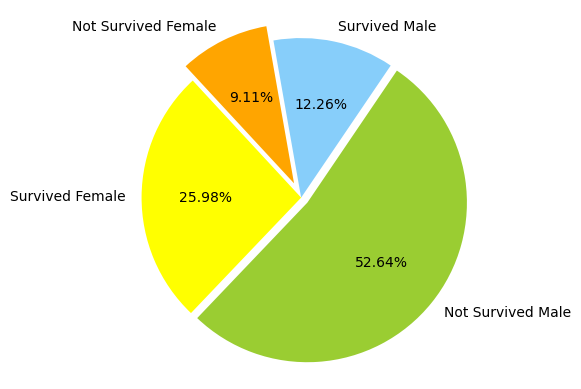

In [70]:
plt.pie(p,
       labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"],
       colors=['lightskyblue','yellowgreen','Yellow','Orange'],
       explode=[0,0.05,0,0.1],
       startangle=100,
       autopct="%.2f%%",
       counterclock=False)
plt.axis('equal')
plt.show()